* [Импорт](#import)
* [Загрузка данных](#load)
* [Обзор данных](#info)
* [Обнаружение отсутствующих значений](#missings)
* [Подготовка данных](#prepare)
* [Обучение модели](#fitting)
* [Сохранение результатов](#saving)

### Импорт <a class='anchor' id='import'>

In [141]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings('ignore')

### Загрузка данных <a class='anchor' id='load'>

In [142]:
train = pd.read_csv('data/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [143]:
test = pd.read_csv('data/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


|Variable |	Definition | Key 
|---|---|---|
| `Survival`	| Survival	| `0` = No, `1` = Yes 
| `Pclass` | Ticket class | `1` = 1st, `2` = 2nd, `3` = 3rd
| `Sex`	| Sex	| 
| `Age`	| Age in years	| 
| `Sibsp`	| # of siblings / spouses aboard the Titanic	| 
| `Parch`	| # of parents / children aboard the Titanic	| 
| `Ticket`	| Ticket number	|
| `Fare`	| Passenger fare	|
| `Cabin`	| Cabin number	|
| `Embarked`	| Port of Embarkation |	`C` = Cherbourg, `Q` = Queenstown, `S` = Southampton 

### Обзор данных <a class='anchor' id='info'>

In [10]:
train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Колонки `Age`, `Cabin`, `Embarked` и `Fare` содержат пропуски.


In [69]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [70]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


В колонке `Fare` есть примеры с нулевой стоимостью билета.

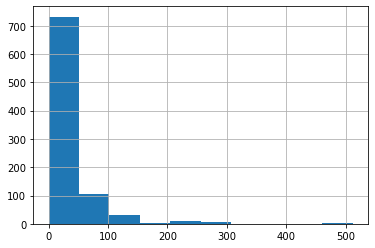

In [72]:
train.Fare.hist();

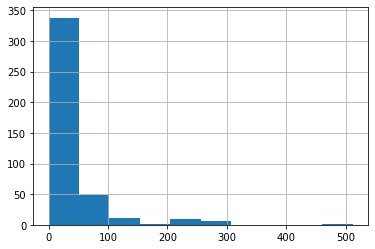

In [73]:
test.Fare.hist();

Распределение `Fare` заметно отличается от нормального.

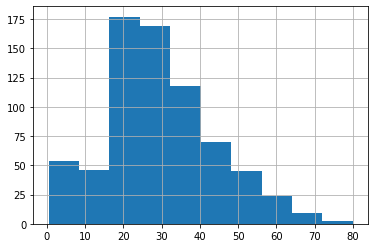

In [74]:
train.Age.hist();

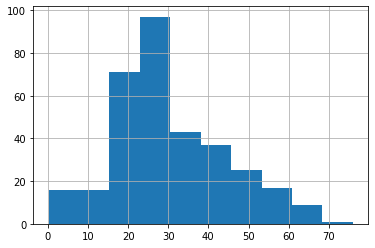

In [75]:
test.Age.hist();

Распределение `Age` более напоминает нормальное.

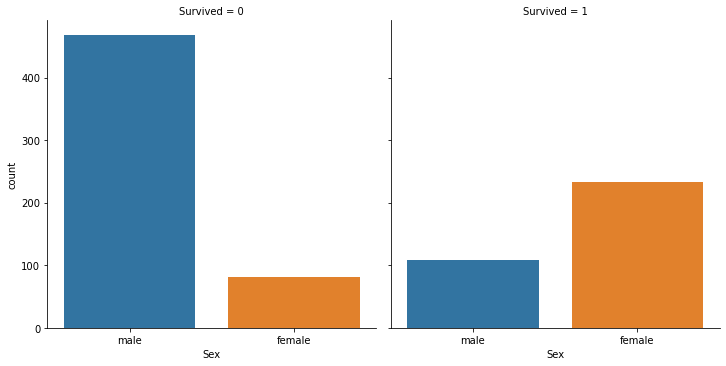

In [76]:
sns.catplot(x = 'Sex', col = 'Survived', kind = 'count', data = train);

Большинство погибших - мужчины.

In [93]:
print('Procent of survivals:')
print(f"Male Survived: {round(train.Survived[train.Sex == 'male'].sum()/train[train.Sex == 'male'].Survived.count() * 100)}%")
print(f"Female Survived: {round(train.Survived[train.Sex == 'female'].sum()/train[train.Sex == 'female'].Survived.count() * 100)}%")

Procent of survivals:
Male Survived: 19%
Female Survived: 74%


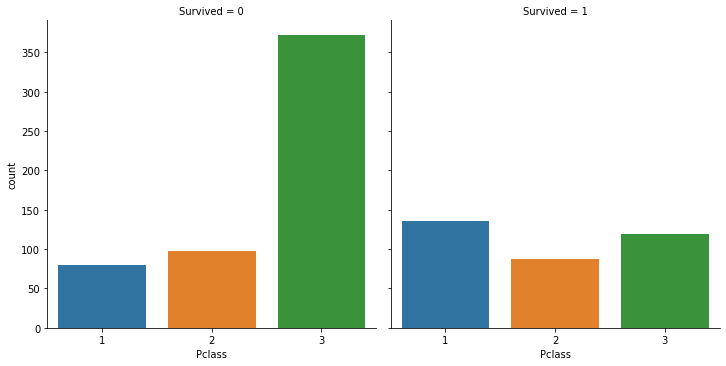

In [94]:
sns.catplot(x = 'Pclass', col = 'Survived', kind = 'count', data = train);

Среди погибших - большинство из 3го класса.

In [79]:
print('Procent of survivals:')
print(f"Class 1: {round(train.Survived[train.Pclass == 1].sum()/train[train.Pclass == 1].Survived.count() * 100)}%")
print(f"Class 2: {round(train.Survived[train.Pclass == 2].sum()/train[train.Pclass == 2].Survived.count() * 100)}%")
print(f"Class 3: {round(train.Survived[train.Pclass == 3].sum()/train[train.Pclass == 3].Survived.count() * 100)}%")

Procent of survivals:
Class 1: 63%
Class 2: 47%
Class 3: 24%


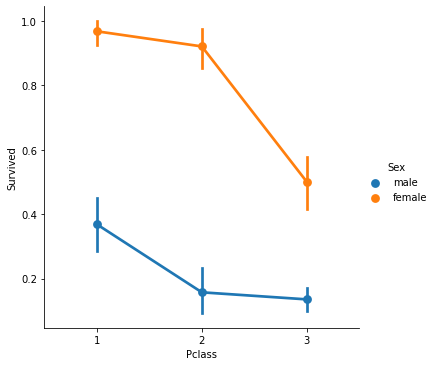

In [80]:
sns.catplot('Pclass', 'Survived', hue='Sex', kind = 'point', data = train);

Вероятность выжить заметно падает для мужчин при переходе от 1го ко 2му классу, и для женщин при переходе от 2го к 3му классу.

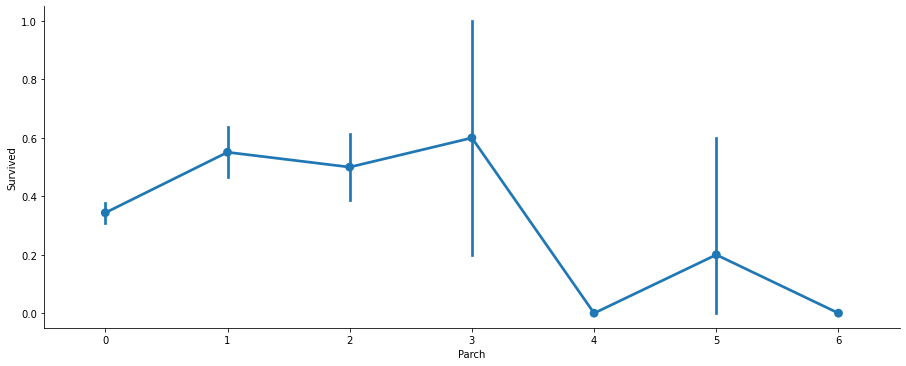

In [133]:
axes = sns.factorplot('Parch','Survived', 
                      data=train, aspect = 2.5);

Наличие 1-3х детей немного повышает вероятность выживания, в то же время наличие более чем 3х детей значительно ее снижает.

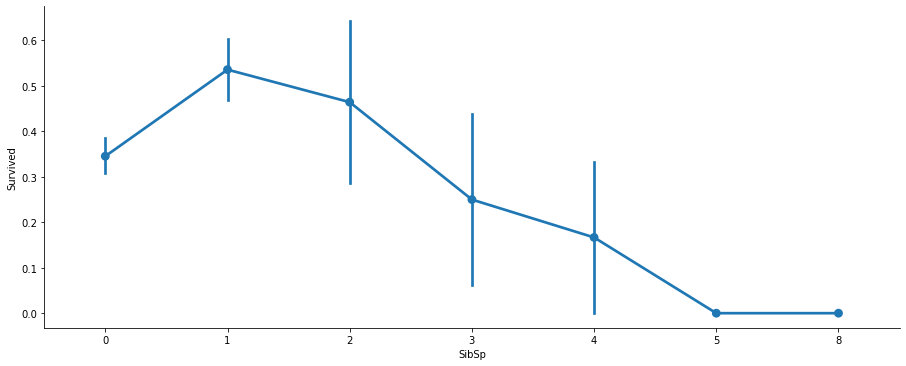

In [134]:
axes = sns.factorplot('SibSp','Survived', 
                      data=train, aspect = 2.5);

С братьями/сестрами ситуация схожая: наличие одного брата/одной сестры (это может быть также и супруг/супруга) повышает шансы на выживание, а более 1го - их снижает.

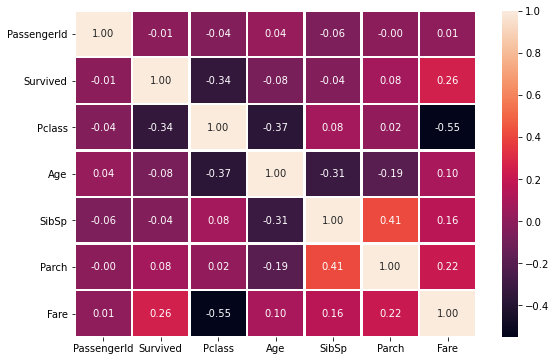

In [81]:
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(train.corr(), annot=True, linewidths=1.5, fmt='.2f', ax=ax);

### Обнаружение отсутствующих значений <a class='anchor' id='missings'>

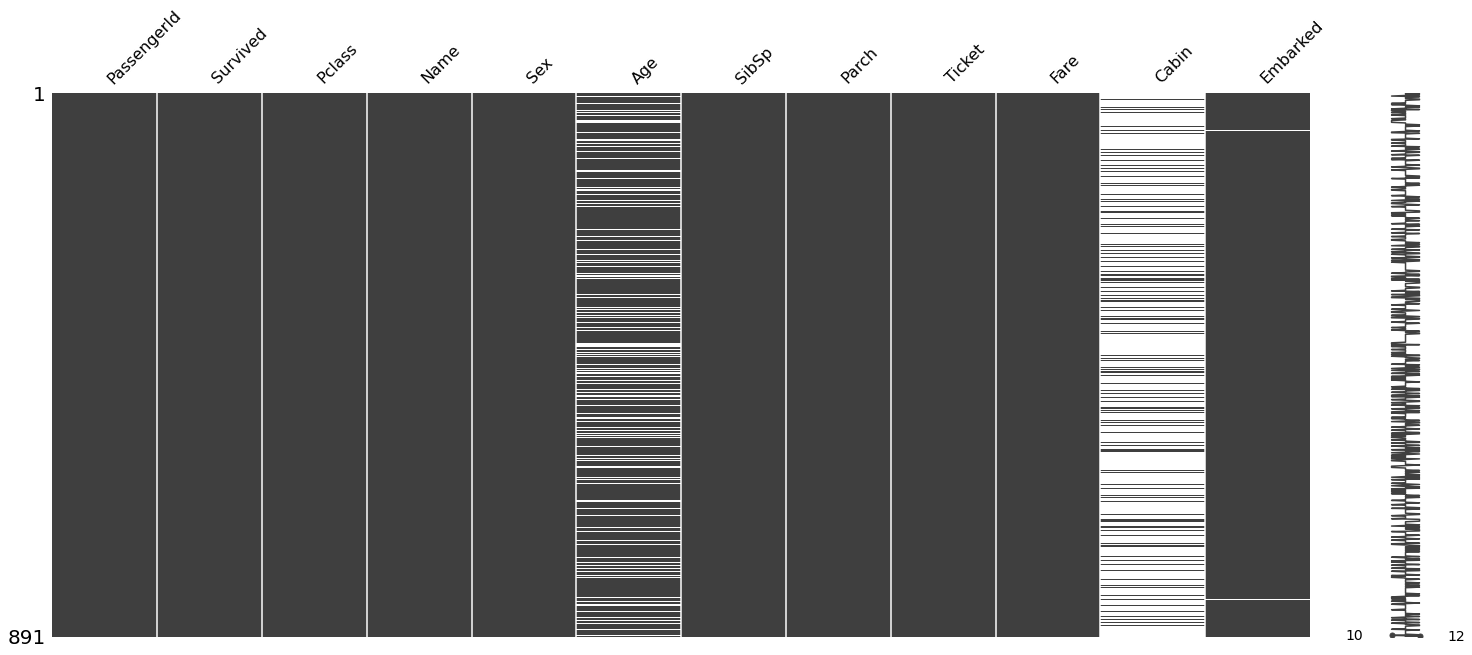

In [137]:
msno.matrix(train);

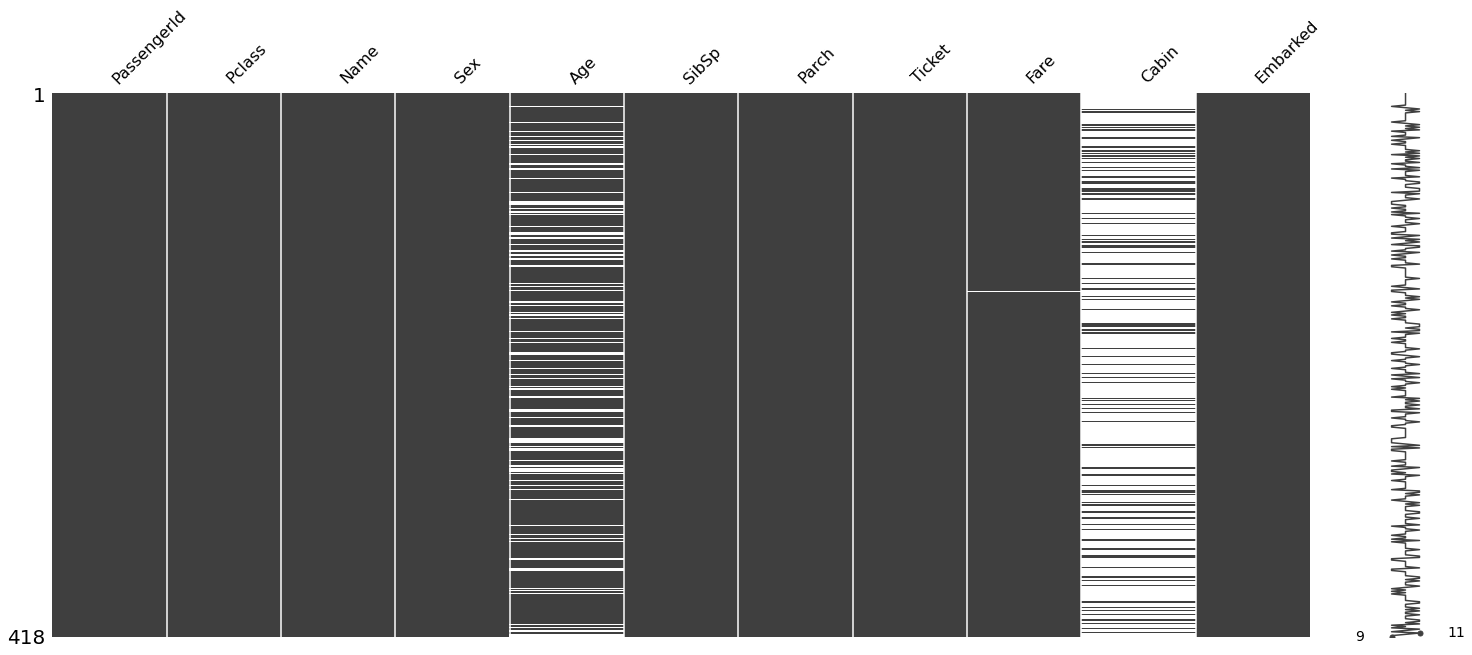

In [138]:
msno.matrix(test);

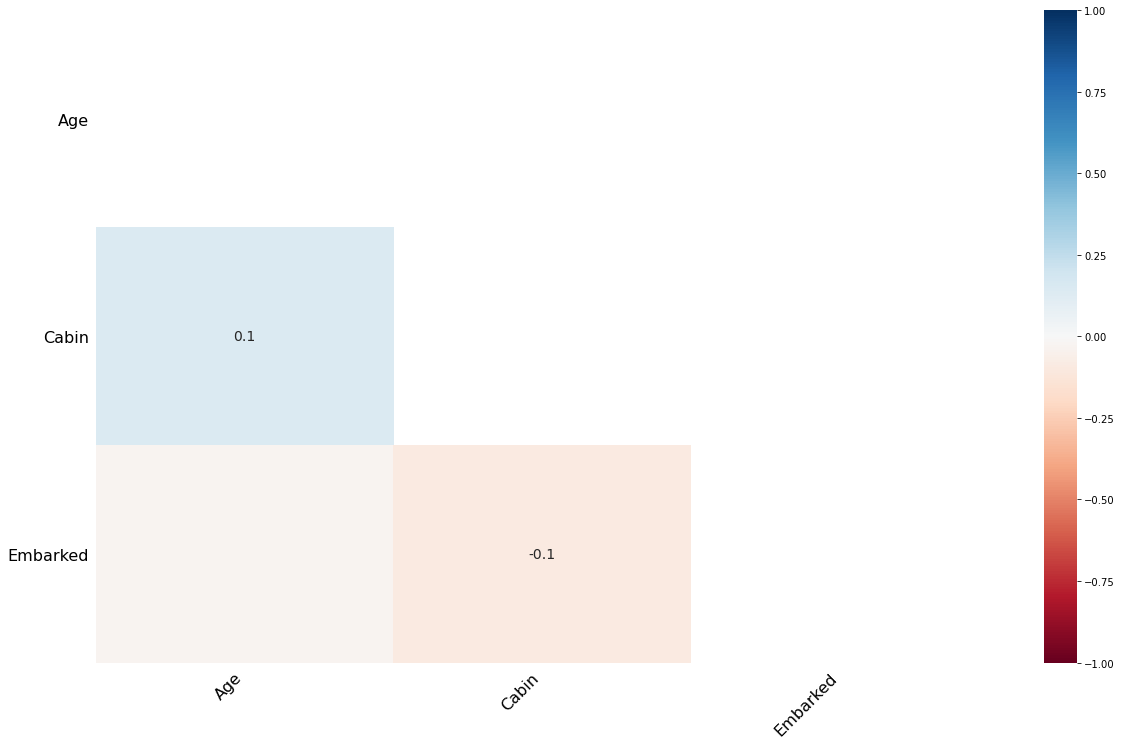

In [140]:
msno.heatmap(train);

Между отсутствующими значениями взаимосвязь не прослеживается.

### Подготовка данных <a class='anchor' id='prepare'>

In [144]:
data = [train, test]

for dataset in data:
    
    # заполняем Nan и нулевые значения
    
    dataset['Age'].fillna(dataset['Age'].median(), inplace=True)               
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace=True)                                    
    dataset['Fare'][dataset['Fare'] == 0] = dataset['Fare'].median()                  
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True) 

In [145]:
cabins = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'T': 7}

for dataset in data:
    
    # создаем новые переменные 
    
    # выделяем класс каюты в отдельную переменную
    dataset['Cabin_class'] = dataset['Cabin'].str[0]
    dataset['Cabin_class'] = dataset['Cabin_class'].map(cabins)
    dataset['Cabin_class'].fillna(dataset['Cabin_class'].median(), inplace=True) 
    
    # считаем количество кают на человека/семью
    dataset['Cabins_count'] = dataset['Cabin'].apply(lambda x: 0 if pd.isna(x) else len(x.split()))
    
    # считаем количество родственников на борту итого
    dataset['Family'] = dataset['SibSp'] + dataset['Parch']   
    
    # выделяем в отдельную переменную плывет человек один или с семьей
    dataset['Alone'] = 0                                                                             
    dataset['Alone'][dataset['Family'] > 0] = 1 
    
    # считаем количество людей, плывущих по одному билету
    ticket_count = dataset.groupby('Ticket', as_index=False)['Name'].count().rename(columns={'Name': 'Ticket_count'})
    ticket_count_df = pd.DataFrame(dataset['Ticket']).merge(ticket_count, on='Ticket')
    dataset['Ticket_count'] = ticket_count_df['Ticket_count']  
    

In [146]:
for dataset in data:
    
    # удаляем лишние столбцы
    
    dataset.drop(['Cabin', 'PassengerId', 'Ticket', 'Name', 'Cabin_class'], axis=1, inplace=True)    

In [147]:
# выделяем целевую переменную и удаляем ее из тренировочных данных
x_train = train.drop('Survived', axis=1)

y_train = train['Survived']

In [148]:
# кодируем категориальные переменные с помощью one-hot encoding
x_train = pd.get_dummies(x_train, columns=['Sex', 'Embarked'])
x_test = pd.get_dummies(test, columns=['Sex', 'Embarked'])

In [149]:
# разбиваем train на x_train и x_valid
x_train, x_valid = train_test_split(x_train, train_size=0.7, shuffle=True, random_state=2)
y_train, y_valid = train_test_split(y_train, train_size=0.7, shuffle=True, random_state=2)

In [152]:
x_train.head()

,Pclass,Age,SibSp,Parch,Fare,Cabins_count,Family,Alone,Ticket_count,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
451,3,28.0,1,0,19.9667,0,1,1,2,0,1,0,0,1
345,2,24.0,0,0,13.0000,1,0,0,2,1,0,0,0,1
687,3,19.0,0,0,10.1708,0,0,0,3,0,1,0,0,1
279,3,35.0,1,1,20.2500,0,2,1,2,1,0,0,0,1
742,1,21.0,2,2,262.3750,4,4,1,1,1,0,1,0,0


In [153]:
x_test.head()

,Pclass,Age,SibSp,Parch,Fare,Cabins_count,Family,Alone,Ticket_count,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,0,0,1,0,1,0,1,0
1,3,47.0,1,0,7.0000,0,1,1,1,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,0,0,1,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,0,0,1,0,1,0,0,1
4,3,22.0,1,1,12.2875,0,2,1,1,1,0,0,0,1


### Обучение модели <a class='anchor' id='fitting'>

In [150]:
# обучаем модель и получаем прогнозы
rf = RandomForestClassifier(n_estimators=100, max_depth=2, oob_score=True, random_state=21, criterion='entropy')
rf.fit(x_train, y_train)

y_pred_train = rf.predict(x_train)
y_pred_valid = rf.predict(x_valid)
y_pred_test = rf.predict(x_test)

print(f'Train accuracy: {accuracy_score(y_train, y_pred_train)}')
print(f'Valid accuracy:  {accuracy_score(y_valid, y_pred_valid)}')

Train accuracy: 0.8170144462279294
Valid accuracy:  0.7649253731343284


### Сохранение результатов <a class='anchor' id='saving'>

In [ ]:
# получение прогнозов на test и сохранение результатов
pred_df = pd.DataFrame(y_pred_test, columns=['Survived'])
gender_submission = pd.read_csv('data/gender_submission.csv').drop('Survived', axis=1)
prediction_rf = pd.merge(gender_submission, pred_df, left_index=True, right_index=True)
prediction_rf.to_csv('predictions/prediction_rf.csv', index=False)